<a href="https://colab.research.google.com/github/yenlung/Deep-Learning-Basics/blob/master/colab01%E6%A8%99%E6%BA%96%E7%9A%84%20Fully%20Connected%20(Dense)%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

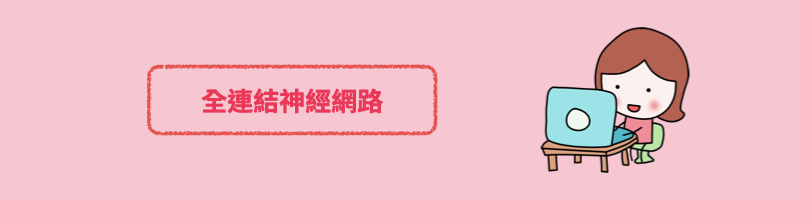

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

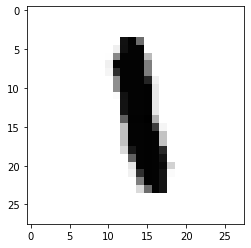

In [11]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [12]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [15]:
model = Sequential()

In [16]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [17]:
model.add(Dense(100, activation='relu'))

In [18]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [19]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), 
              metrics=['accuracy'])

#### 欣賞我們的作品

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [21]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

2021-10-19 15:05:16.855133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-19 15:05:16.855560: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-10-19 15:05:16.940688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
600/600 [==============================] - 3s 3ms/step - loss: 0.0856 - accuracy: 0.3246
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0582 - accuracy: 0.6700
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0312 - accuracy: 0.8356
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0225 - accuracy: 0.8697
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0190 - accuracy: 0.8851
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0171 - accuracy: 0.8945
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0158 - accuracy: 0.9011
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9064
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.9108
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9137

### 6. step 3: 預測 (testing)

In [22]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

2021-10-19 15:05:55.384961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


神經網路預測是: 6


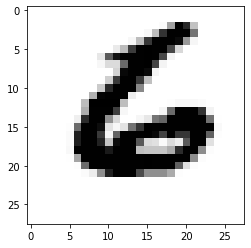

In [23]:
n = 9999

print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

我們用互動模式展示我們的訓練成果。

In [25]:
from ipywidgets import interact_manual

In [26]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', y_predict[測試編號])

In [27]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [28]:
score = model.evaluate(x_test, y_test)

 57/313 [====>.........................] - ETA: 0s - loss: 0.0129 - accuracy: 0.9205

2021-10-19 15:06:57.216843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9378


In [29]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.010124714113771915
正確率 0.9378000497817993


### 7. 儲存我們的 model

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [27]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [28]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [30]:
model.save('my_dnn_model')

INFO:tensorflow:Assets written to: my_dnn_model/assets


2021-10-19 15:07:11.420500: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
